# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import stats

In [2]:
df = pd.read_csv('/data/datasets/auto-mpg.csv')

#### Make a univariate analysis of mpg and weight

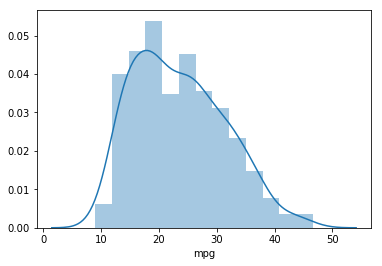

In [3]:
sns.distplot(df.mpg);

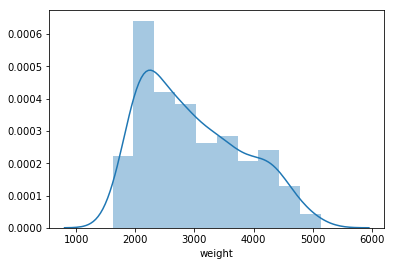

In [4]:
sns.distplot(df.weight)

#### Create a heatmap over the variables

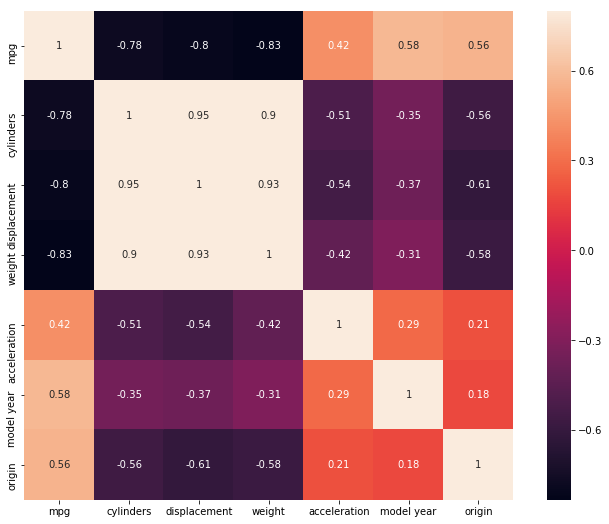

In [5]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

#### It seems that weight and displacement have very strong correlations with mpg. Make a Bi-variate analysis of mpg vs weight and of mpg vs displacement. 

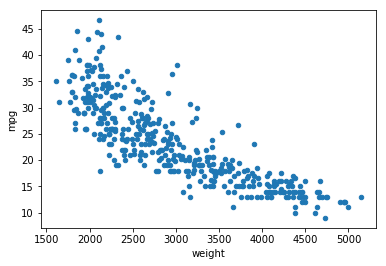

In [6]:
df.plot.scatter(x='weight', y='mpg');

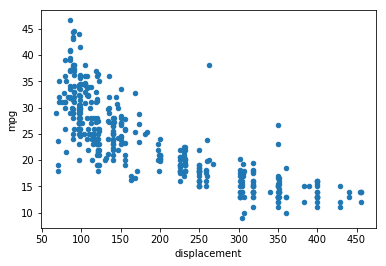

In [7]:
df.plot.scatter(x='displacement', y='mpg');

#### Are there any clear outliers? If so remove them.

In [8]:
df[(df.mpg > 35) & (df.displacement > 250) ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
387,38.0,6,262.0,85,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [9]:
df = df.drop(387)

#### Visually compare mpg to a Normal Distribution

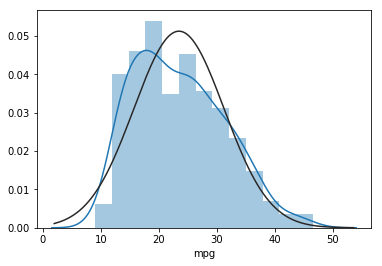

In [10]:
sns.distplot(df.mpg, fit=norm);

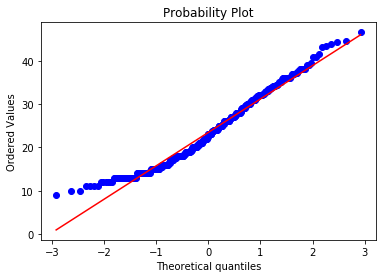

In [11]:
stats.probplot(df.mpg, plot=plt);

#### Transform mpg, weight and displacement to a normal distribution using a Box-Cox power tranformation. Plot the univariate distribution for mpg and a scatter plot for mpg vs displacement.

In [12]:
stats.boxcox(df.mpg)[1]

0.19597305272123045

In [13]:
dfp = df.copy()
dfp.mpg = dfp.mpg ** 0.195973

In [14]:
stats.boxcox(df.weight)[1]

-0.3297612897804876

In [15]:
stats.boxcox(df.displacement)[1]

-0.3142454680803841

In [16]:
dfp.weight = dfp.weight ** -0.32976

In [17]:
dfp.displacement = dfp.displacement ** -0.3142455

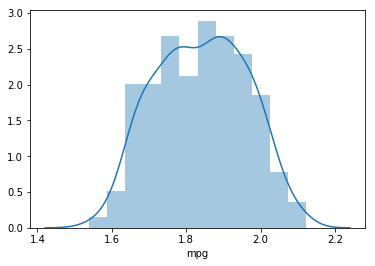

In [18]:
sns.distplot(dfp.mpg)

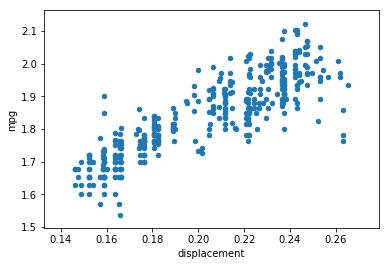

In [19]:
dfp.plot.scatter(x='displacement', y='mpg');

#### You can create a boolean index for rows with a car name that contains a certain brand (see the code below). Using this code, create dummy variables for the brands Chevrolet, Ford and Buick.

In [20]:
df['car name'].str.contains('chevrolet')

0       True
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
367     True
368     True
369     True
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
388    False
389    False
390    False
391    False
392     True
393    False
394    False
395    False
396    False
397    False
Name: car name, Length: 397, dtype: bool

In [21]:
df['is_ford'] = df['car name'].str.contains('ford') * 1

In [22]:
df['is_buick'] = df['car name'].str.contains('buick') * 1

In [23]:
df['is_chevrolet'] = df['car name'].str.contains('chevrolet') * 1